## **I. PREPARING TRAINING DATA**

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

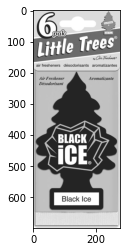

In [9]:
# adding class/catgeory of our images, ensure that they are separated by correct folder names
DATADIR = "automotive_images"
CATEGORIES = ["AIR FRESHENERS", "CAR AUDIO"] 

# convert the images to grayscale
for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to category images
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [10]:
print(img_array.shape)
print(img_array)

(700, 279)
[[220 220 220 ... 220 220 220]
 [220 220 220 ... 220 220 220]
 [220 220 220 ... 220 220 220]
 ...
 [254 252 252 ... 255 255 255]
 [254 253 251 ... 255 255 255]
 [255 253 251 ... 253 253 253]]


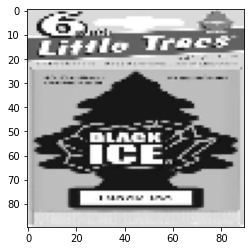

In [11]:
IMG_SIZE = 90 #you can change this to other size but 90 is the best visible image for automotive products
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [12]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # path to category images
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
        
create_training_data()

In [13]:
print(len(training_data))

3000


In [14]:
import random
random.shuffle(training_data)

In [15]:
# Labeling the training data
X = [] #features
y = [] #label

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [18]:
y[:100]

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [19]:
# Saving the X and y values to pickle for future use
# This is important when handling several datasets to prevent from labeling repeatedly

import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close

<function BufferedWriter.close>

## **2. CONVOLUTIONAL NEURAL NETWORK (CNN) MODEL**

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [21]:
# load pickle files X and y
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

# normalize the data when min is 0 and max is 255
X = X/255

# layer 1
model = Sequential()
model.add( Conv2D(64, (3,3), input_shape = X.shape[1:]) ) # X.shape = (120, 120, 1)
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

# layer 2
model.add( Conv2D(64, (3,3) ))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(64))

# output layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

# fit the model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.3)

Epoch 1/10
66/66 [==============================] - 14s 200ms/step - loss: 0.6354 - accuracy: 0.7295 - val_loss: 0.4401 - val_accuracy: 0.8211
Epoch 2/10
66/66 [==============================] - 13s 199ms/step - loss: 0.3301 - accuracy: 0.8614 - val_loss: 0.3510 - val_accuracy: 0.8689
Epoch 3/10
66/66 [==============================] - 15s 225ms/step - loss: 0.2412 - accuracy: 0.9048 - val_loss: 0.3558 - val_accuracy: 0.8567
Epoch 4/10
66/66 [==============================] - 14s 213ms/step - loss: 0.1772 - accuracy: 0.9367 - val_loss: 0.3304 - val_accuracy: 0.8889
Epoch 5/10
66/66 [==============================] - 15s 221ms/step - loss: 0.1214 - accuracy: 0.9548 - val_loss: 0.3998 - val_accuracy: 0.8878
Epoch 6/10
66/66 [==============================] - 14s 219ms/step - loss: 0.0797 - accuracy: 0.9729 - val_loss: 0.3918 - val_accuracy: 0.9022
Epoch 7/10
66/66 [==============================] - 14s 211ms/step - loss: 0.0519 - accuracy: 0.9838 - val_loss: 0.5001 - val_accuracy: 0.8978

## **3. Validation**

In [32]:
def predict_category(path):
    test_image = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (IMG_SIZE, IMG_SIZE)) # convert the test image to grayscale
    test_image = np.array(test_image).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # and to np.array
    prediction = model.predict(test_image)
    
    if prediction == 0:
        print(prediction, ': AIR FRESHENER')
    else:
        print(prediction, ': CAR AUDIO')

In [33]:
predict_category('test_images/AF.jpg')

[[0.]] : AIR FRESHENER


## 4. Save Model

In [34]:
tf.keras.models.save_model(model,'PR_model.hdf5')